## Download ArXiv Articles: Computation and Language

In [5]:
from datasets import load_dataset

# Load data from huggingface
dataset = load_dataset('MaartenGr/arxiv_nlp')

# Extract metadata
abstracts = dataset['train']['Abstracts']
titles = dataset['train']['Titles']

## Pipeline for Text Clustering

### 1. Embedding Documents

In [8]:
from sentence_transformers import SentenceTransformer

embedding_model  = SentenceTransformer('thenlper/gte-small')

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

C:\Users\Zeeshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Zeeshan\.cache\huggingface\hub\models--thenlper--gte-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [15]:
embeddings.shape

(44949, 384)

### 2- Reducing the Dimensionality of Embeddings

In [12]:
from umap import UMAP

# Reduce the input embeddings from 384 dimenstions to 5 dimenstions
umap_model = UMAP(n_components=5, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

C:\Users\Zeeshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### 3- Cluster the Reduced Embeddings

In [19]:
from hdbscan import HDBSCAN

# Fit the model and extract the clusters
hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom')
hdbscan_model.fit(reduced_embeddings)
clusters = hdbscan_model.labels_

In [22]:
len(set(clusters))

150

### Inspecting the Clusters

In [23]:
import numpy as np

In [36]:
cluster = 50
for index in np.where(cluster == clusters)[0][:3]:
    print(abstracts[index][:300] + "... \n")

  We study the problem of model extraction in natural language processing, in
which an adversary with only query access to a victim model attempts to
reconstruct a local copy of that model. Assuming that both the adversary and
victim model fine-tune a large pretrained language model such as BERT (De... 

  We study the problem of adversarial language games, in which multiple agents
with conflicting goals compete with each other via natural language
interactions. While adversarial language games are ubiquitous in human
activities, little attention has been devoted to this field in natural language
pr... 

  Query recommendations in search engines is a double edged sword, with
undeniable benefits but potential of harm. Identifying unsafe queries is
necessary to protect users from inappropriate query suggestions. However,
identifying these is non-trivial because of the linguistic diversity resulting
fr... 



### Cluster Plotting

In [37]:
import pandas as pd
from umap import UMAP

# Reduce the input embeddings from 384 dimenstions to 5 dimenstions
umap_model = UMAP(n_components=2, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

C:\Users\Zeeshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [49]:
# Create the dataframe
df = pd.DataFrame(reduced_embeddings, columns=["X", "Y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select Outliers and non-outliers clusters
clusters_df = df.loc[df.cluster != "-1", :]
outlierss_df = df.loc[df.cluster == "-1", :]

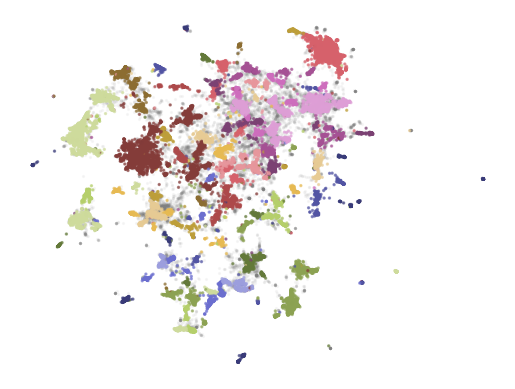

In [55]:
import matplotlib.pyplot as plt

plt.scatter(outlierss_df.X, outlierss_df.Y, alpha=0.05, s=2, c="grey")
plt.scatter(clusters_df.X, clusters_df.Y, alpha=0.6, s=2, cmap="tab20b", c=clusters_df.cluster.astype(int))
plt.axis('off')
plt.show()